## Constants and imports

In [1]:
DEPTH = 16
ITER = 2000

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
from sklearn.svm import SVC

pd.options.display.max_columns = None
pd.options.display.max_rows = None

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data preprocessing

In [3]:
agent_tuned = pd.read_csv('/kaggle/input/aeroclub/request_agent_tunned.csv')
client_tuned = pd.read_csv('/kaggle/input/aeroclub/request_client_tunned.csv')
display(agent_tuned.head())
client_tuned.head()

/tmp/ipykernel_20/3306113334.py:2: DtypeWarning: Columns (3,43) have mixed types. Specify dtype option on import or set low_memory=False.
  client_tuned = pd.read_csv('/kaggle/input/aeroclub/request_client_tunned.csv')


,RequestID,EmployeeId,RequestDate,ClientID,TravellerGrade,RequestDepartureDate,RequestReturnDate,DepartureDate,ArrivalDate,ReturnDepatrureDate,ReturnArrivalDate,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,SentOption,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5,FlightDate_1,FlightDate_2,FlightDate_3,FlightDate_4,FlightDate_5
0,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 07:40:00.000,2022-06-14 08:50:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,14356,2,0,1,1,0,1,0,266,164,116,132,154,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN
1,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,23712,2,1,1,1,0,0,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN
2,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,21485,2,1,1,1,1,0,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN
3,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,18212,2,1,1,2,0,0,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN
4,4175300,2086,2022-06-01 02:49:18.297,40811,0,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,17360,2,1,1,1,1,1,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104,2022.06.14,2022.06.15,NaN,NaN,NaN


,RequestID,RequestDate,ClientID,ClientGrade,RequestDepartureDate,RequestReturnDate,DepartureDate,ArrivaDate,ReturnDepatrureDate,ReturnArrivalDate,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,FrequentFlyer,SelectedVariant,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5,FlightDate_1,FlightDate_2,FlightDate_3,FlightDate_4,FlightDate_5
0,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,3925,1,0,2,2,1,1,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN
1,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,4351,1,0,2,2,0,1,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN
2,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,5925,1,1,2,2,1,1,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN
3,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,6351,1,1,2,2,0,1,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN
4,4178519,2022-06-01 09:55:44.810,24604,NaN,2022-06-15 00:00:00.000,NaN,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,9900,1,1,2,2,1,0,3,0,1,13,15,8,428,703,424,270,146,2,55,65,42,39,49,46,29,26,24,2022.06.15,NaN,NaN,NaN,NaN


In [4]:
agent_tuned = agent_tuned.select_dtypes(include='int64')
client_tuned = client_tuned.select_dtypes(include='int64')
agent_tuned = agent_tuned[[n for n in agent_tuned.columns if n not in ['RequestID', 'EmployeeId', 'ClientID']]]
client_tuned = client_tuned[[n for n in client_tuned.columns if n not in ['RequestID', 'EmployeeId', 'ClientID']]]
display(agent_tuned.sample(5))
client_tuned.sample(5)

,TravellerGrade,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,SentOption,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
271364,0,4,603242,0,1,1,1,0,0,0,176,187,129,83,1991,1601,805,250,1105,283,90,85,197,168,77,66,52,121,104
70613,0,2,83225,2,1,1,1,0,1,0,158,190,235,157,1795,1782,5904,3006,1105,158,90,85,321,286,301,218,180,121,104
172303,0,1,18868,2,1,1,1,0,0,0,176,7,235,157,6692,7794,5904,3006,1105,252,6,317,344,286,301,218,180,121,104
342690,0,4,118338,2,1,1,1,1,1,0,176,231,158,83,6862,6365,4895,2283,1105,283,148,140,57,53,123,99,169,121,104
592837,0,6,145317,2,1,2,2,0,1,0,154,36,27,72,1787,1562,5627,2881,76,153,90,85,43,40,34,31,26,20,34


,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,FrequentFlyer,SelectedVariant,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
307608,2,9748,1,1,1,1,1,0,1,0,1,9,9,5,293,336,424,270,146,2,34,34,33,39,49,46,29,26,24
427237,5,35457,1,0,1,1,0,0,1,0,1,8,8,5,257,292,142,129,56,0,49,49,28,28,24,24,18,18,2
41867,1,10986,1,1,1,1,0,1,2,0,1,9,15,8,402,703,424,270,146,2,34,65,42,39,49,46,29,26,24
670989,4,36414,1,0,1,1,0,0,1,0,1,9,9,5,474,526,359,218,146,0,55,55,19,19,39,38,4,26,24
596740,2,9615,1,1,2,2,1,1,1,0,1,8,8,5,166,168,424,270,146,0,33,33,7,39,49,46,29,26,24


In [5]:
df_agent_feat = agent_tuned[[n for n in agent_tuned.columns if n not in ['SentOption', 'RequestID', 'EmployeeId', 'ClientID', 'TravellerGrade']]]
df_agent_lab = agent_tuned['SentOption']
display(df_agent_feat.sample())
df_agent_lab.sample()

,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
184044,2,86660,2,1,0,1,0,1,194,124,235,157,6575,5449,5904,3006,1105,192,303,270,141,286,301,218,180,121,104


45375    0
Name: SentOption, dtype: int64

In [6]:
df_client_feat = client_tuned[[n for n in client_tuned.columns if n not in ['SelectedVariant', 'RequestID', 'EmployeeId', 'ClientID', 'FrequentFlyer']]]
df_client_lab = client_tuned['SelectedVariant']
display(df_client_feat.sample())
df_client_lab.sample()

,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
869694,2,92075,0,1,0,1,1,0,1,0,0,5,218,182,424,270,146,0,2,2,7,39,49,46,29,26,24


695929    0
Name: SelectedVariant, dtype: int64

In [7]:
pd.Series(df_agent_feat.columns).compare(pd.Series(df_client_feat.columns))

,self,other


In [8]:
x = pd.concat([df_agent_feat, df_client_feat])
y = pd.DataFrame(pd.concat([df_agent_lab, df_client_lab]))
display(x.head())
display(y.head())
print(len(df_agent_feat) + len(df_client_feat))
print(len(y))

,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
0,2,14356,2,0,1,1,0,1,266,164,116,132,154,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104
1,2,23712,2,1,1,1,0,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104
2,2,21485,2,1,1,1,1,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104
3,2,18212,2,1,1,2,0,0,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104
4,2,17360,2,1,1,1,1,1,266,164,116,132,6542,5904,5904,3006,1105,260,188,169,296,286,301,218,180,121,104


,0
0,0
1,0
2,0
3,0
4,0


1629395
1629395


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
display(x_train.head(), y_train.head())

,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,DepartureLocation_1,DestinationLocation_1,DepartureLocation_2,DestinationLocation_2,AirlinesCode_1,AirlinesCode_2,AirlinesCode_3,AirlinesCode_4,AirlinesCode_5,FlightDepartureLocation_1,FlightDestinationLocation_1,FlightDepartureLocation_2,FlightDestinationLocation_2,FlightDepartureLocation_3,FlightDestinationLocation_3,FlightDepartureLocation_4,FlightDestinationLocation_4,FlightDepartureLocation_5,FlightDestinationLocation_5
273672,1,4245,1,0,1,1,0,1,1,9,15,8,450,703,424,270,146,0,34,65,42,39,49,46,29,26,24
56838,2,16697,2,1,1,1,1,1,257,190,132,128,7845,7156,5904,3006,1105,253,81,76,285,286,301,218,180,121,104
593551,2,5210,1,0,1,1,1,1,1,8,8,5,164,167,424,270,146,0,33,33,7,39,49,46,29,26,24
11796,2,22080,1,1,1,1,1,1,1,9,9,5,149,160,424,270,146,0,34,34,7,39,49,46,29,26,24
7306,2,133173,0,1,2,2,0,1,176,164,116,83,5641,5721,5904,3006,1105,252,188,169,321,286,301,218,180,121,104


,0
273672,0
56838,0
593551,0
11796,0
7306,0


## Model training


In [10]:
'''
clf = CatBoostClassifier(logging_level='Silent')

params = {
    'depth': [11, 13, 15], 
    'iterations': [1000, 1500, 2000], 
    'learning_rate': [0.05, 0.1, 0.15]
}

grid_search_result = clf.grid_search(params, X=df_feat, y=df_lab, stratified=True, plot=True)
'''

"\nclf = CatBoostClassifier(logging_level='Silent')\n\nparams = {\n    'depth': [11, 13, 15], \n    'iterations': [1000, 1500, 2000], \n    'learning_rate': [0.05, 0.1, 0.15]\n}\n\ngrid_search_result = clf.grid_search(params, X=df_feat, y=df_lab, stratified=True, plot=True)\n"

In [11]:

clf = CatBoostClassifier(depth=DEPTH, iterations=ITER, logging_level='Silent')
clf.fit(x_train, y_train)
clf.save_model('aeroclub_classifier')


In [12]:
'''
clf = CatBoostClassifier()
clf.load_model('/kaggle/input/aeroclub/aeroclub_classifier')
'''

"\nclf = CatBoostClassifier()\nclf.load_model('/kaggle/input/aeroclub/aeroclub_classifier')\n"

# Metrics

In [13]:
y_pred = clf.predict(x_test)
print(y_pred[:5])
display(y_test.head())

[0 0 0 0 1]


,0
6715,0
260978,0
72827,0
96081,0
273594,1


In [14]:
print(m.classification_report(y_test, y_pred, target_names = ['Not choosed', 'Choosed']))

              precision    recall  f1-score   support

 Not choosed       0.99      1.00      0.99    319947
     Choosed       0.53      0.24      0.33      5932

    accuracy                           0.98    325879
   macro avg       0.76      0.62      0.66    325879
weighted avg       0.98      0.98      0.98    325879



In [15]:
print(m.confusion_matrix(y_test, y_pred))

[[318669   1278]
 [  4515   1417]]


In [16]:
specifity = m.recall_score(y_test, y_pred, pos_label=0)
specifity

0.996005588425583

In [17]:
print(m.roc_auc_score(y, clf.predict_proba(x)[:, 1]))

0.9785627169004467


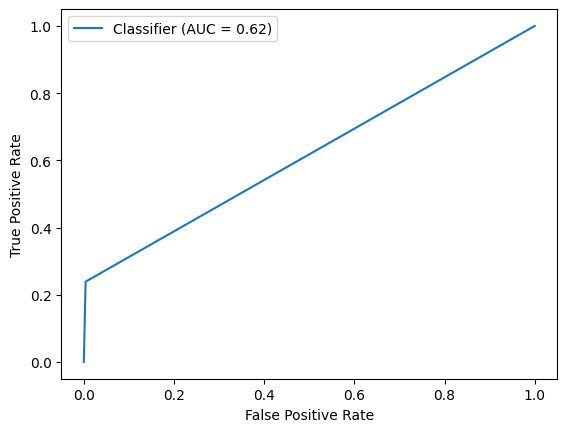

In [18]:
m.RocCurveDisplay.from_predictions(y_test, y_pred)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()